# Scraping

Install Selenium

In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 23.9 MB/s eta 0:00:00


Import Libraries

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from numpy import nan
import pandas as pd
import time

Getting Updates and Chromium

In [ ]:
!apt-get update
!apt-get install chromium-driver

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,429 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [60.9 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,503 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-secur

Configuration for Web Driver (Start)

In [ ]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument("--no-sandbox")
    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--window-size=1920,1200")
    options.add_argument("--disable-dev-shm-usage")
    driver = webdriver.Chrome(options=options)
    return driver

Declare Driver

In [ ]:
driver = web_driver()

Getting HTML for Driver with URL

In [ ]:
driver.get("https://id.jobstreet.com/id/jobs")

Pathing Specific Class in HTML

In [ ]:
containers = driver.find_elements(By.XPATH, '//article[@class="_1unphw40 _1unphw41 tcmsgw8n tcmsgw8o tcmsgw7j tcmsgw7k tcmsgwav tcmsgwaw tcmsgw9r tcmsgw9s tcmsgwh tcmsgw67 tcmsgw5f s57onkb s57onk9 s57onka _1siu89c18 _1siu89c1b tcmsgw33 tcmsgw36"]')

Scraping + Exporting

In [ ]:
import time
import pandas as pd
import numpy as np
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def scraper():
    data = []

    containers = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, '//article[@class="_1unphw40 _1unphw41 tcmsgw8n tcmsgw8o tcmsgw7j tcmsgw7k tcmsgwav tcmsgwaw tcmsgw9r tcmsgw9s tcmsgwh tcmsgw67 tcmsgw5f s57onkb s57onk9 s57onka _1siu89c18 _1siu89c1b tcmsgw33 tcmsgw36"]'))
    )

    for container in containers:
        # Title
        title = container.find_element(By.XPATH, './/div[@class="_1unphw40"]/h3/div/a').text

        # Company
        try:
            company = container.find_element(By.XPATH, './/div[@class="_1unphw40"]/div/span/div/a').text
        except NoSuchElementException:
            company = container.find_element(By.XPATH, './/div[@class="_1unphw40"]/div/span/div/span[2]').text

        # Locations
        locations = container.find_elements(By.XPATH, './/div[@class="_1unphw40"]/span/span/a')
        location_texts = [loc.text for loc in locations]
        location = ", ".join(location_texts)

        # Salary
        try:
            salary = container.find_element(By.XPATH, './/span[@data-automation="jobSalary"]/span').text
        except NoSuchElementException:
            salary = None  # Set salary to None if not found

        # Only add job to data if salary is available
        if salary:
          data.append([title, company, location, salary])

    df = pd.DataFrame(data, columns=['Title', 'Company', 'Location', 'Salary'])
    return df

max_pages = 5
page_count = 0

all_data = pd.DataFrame(columns=['Title', 'Company', 'Location', 'Salary'])

while page_count < max_pages:
    try:
        df = scraper()
        all_data = pd.concat([all_data, df], ignore_index=True)

        print(f"Now scraping page {page_count + 1}...")

        next_page_link = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '//li[@class="_1unphw40 tcmsgwbb tcmsgwb0 tcmsgwx"]/a'))
        )
        # next_page_link = driver.find_element(By.XPATH, '//li[@class="_1etabqi0 _139sf21bb _139sf21b0 _139sf21x"]/a')

        if next_page_link:
            next_page_link.click()
            page_count += 1
            time.sleep(3)

    except StaleElementReferenceException:
        print("Stale element encountered, retrying...")
        time.sleep(3)
        continue

    except NoSuchElementException:
        print("No more pages available")
        break

# Optionally, save the DataFrame to a CSV file
all_data.to_csv('job_data.csv', index=False)

# Print the collected data or save it to a CSV file
print('Data Berhasil di Scraping di File ./content/job_data')

driver.quit()

Now scraping page 1...
Now scraping page 2...
Now scraping page 3...
Now scraping page 4...
Now scraping page 5...
Data Berhasil di Scraping di File ./content/job_data


In [ ]:
df = pd.read_csv('/content/job_data.csv')
df

,Title,Company,Location,Salary
0,HEAD WORKSHOP INTERIOR FURNITURE,Palais Construction,"Tangerang, Banten",Rp 9.000.000 – Rp 11.000.000 per month
1,Sales Executive,PT.MULIA DUTA INDONESIA,"Jakarta Timur, Jakarta Raya","Rp 3,000,000 – Rp 4,000,000 per month"
2,Purchasing Staff Restoran,PT Kideta Boga Multirasa,"Jakarta Utara, Jakarta Raya",Rp 5.000.000 – Rp 6.000.000 per month
3,Supervisor Finance,CV. Radjawali Utama,"Padang, Sumatera Barat",Rp 4.000.000 – Rp 6.000.000 per month
4,Telesales/Telemarketing (Cabang Manado),PT. JAYA BERSAMA SAPUTRA PERKASA,"Manado, Sulawesi Utara",Rp 3.000.000 – Rp 4.500.000 per month
5,Sales Associates,PT Dufrindo Internasional,Bali,Rp 3.500.000 – Rp 4.500.000 per month
6,Real Estate Admin - Back Office,PT Seacrest Real Estate,"Badung, Bali",Rp 4.000.000 – Rp 5.000.000 per month
7,Content Creator (TikTok Specialist),PT ME TOO INTERNATIONAL,"Jakarta Utara, Jakarta Raya","Rp 5,000,000 – Rp 7,000,000 per month"
8,Manager Produksi,PT Cisangkan,"Bandung, Jawa Barat",Rp 8.000.000 – Rp 12.000.000 per month
9,DIMSUM CHEF,PT Surya Tanjung Jaya,"Batam Kota, Kepulauan Riau",Rp 6.000.000 – Rp 8.000.000 per month


# Exploratory



> (If needed) Import Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [ ]:
df = pd.read_csv('/content/job_data.csv')
df

,Title,Company,Location,Salary
0,HEAD WORKSHOP INTERIOR FURNITURE,Palais Construction,"Tangerang, Banten",Rp 9.000.000 – Rp 11.000.000 per month
1,Purchasing Staff Restoran,PT Kideta Boga Multirasa,"Jakarta Utara, Jakarta Raya",Rp 5.000.000 – Rp 6.000.000 per month
2,Customer Relation Officer Jakarta,EF English First Swara Group,"Jakarta Barat, Jakarta Raya",Rp 5.000.000 – Rp 7.000.000 per month
3,Operator Produksi ( Percetakan ),Tumbleryuk,"Jakarta Barat, Jakarta Raya",Rp 2.500.000 – Rp 3.500.000 per month
4,Telesales/Telemarketing (Cabang Manado),PT. JAYA BERSAMA SAPUTRA PERKASA,"Manado, Sulawesi Utara",Rp 3.000.000 – Rp 4.500.000 per month
...,...,...,...,...
2265,Financial Advisor - Area Tangerang Kota,PT AXA Mandiri Financial Services,"Tangerang Selatan, Banten","Rp 3,200,000 – Rp 4,800,000 per month"
2266,Interior Drafter,PT Jensen Group Bali,"Kuta Utara, Bali","Rp 4,000,000 – Rp 6,000,000 per month"
2267,FINANCE ACCOUNTING & TAX,PT Indobeef Indonesia,"Jakarta Selatan, Jakarta Raya",Rp 5.000.000 – Rp 6.000.000 per month
2268,Accounting,PT Mansoer Dasa Bersaudara,"Bandung, Jawa Barat",Rp 4.000.000 – Rp 6.000.000 per month


> (optional) If you want to read in GoogleSheet



In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

EDA Describe

In [ ]:
df.describe()

,Title,Company,Location,Salary
count,2271,2271,2271,2271
unique,1982,1540,253,633
top,Sales Executive,Pengiklan Anonim,Jakarta Raya,Rp 5.000.000 – Rp 7.000.000 per month
freq,22,113,256,89


EDA Check nulls

In [ ]:
df.isnull().sum()

,0
Title,0
Company,0
Location,0
Salary,0


Attribute Variance

In [ ]:
print(df['Title'].value_counts(), "\n")
print(df['Company'].value_counts(), "\n")
print(df['Location'].value_counts(), "\n")
print(df['Salary'].value_counts(), "\n")

Title
Sales Executive                                          22
Host Live Streaming                                      15
Mandarin Translator                                      10
Sales Manager                                             9
Content Creator                                           9
                                                         ..
Team Leader Field Collection Support (Bogor & Bekasi)     1
International Health Insurance Administration             1
ASISTEN OWNER (MANDARIN SPEAKER)                          1
Sous Chef (Kitchen) The Coach Restaurant                  1
Finance & Accounting Supervisor                           1
Name: count, Length: 1982, dtype: int64 

Company
Pengiklan Anonim                                      113
PT. PERSOLKELLY Recruitment Indonesia                  23
RGF HR Agent Indonesia                                 22
PT Cilia Prisma Utama Makmur                           10
PT Home Credit Indonesia                            

View Duplicate

In [ ]:
df = pd.read_csv('/content/job_data.csv')
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows in 'job_data.csv': {num_duplicates}")

print("\nDuplicate Rows:")
duplicate_rows

Number of duplicate rows in 'job_data.csv': 1

Duplicate Rows:


,Title,Company,Location,Salary
1866,Financial Marketing,PT Mitra Cepat Sukses,"Jakarta Pusat, Jakarta Raya",Rp 6.000.000 – Rp 9.000.000 per year


Word Cloud

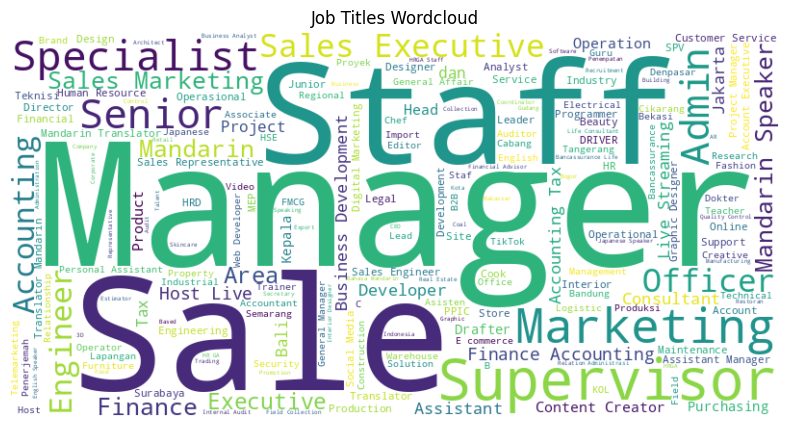

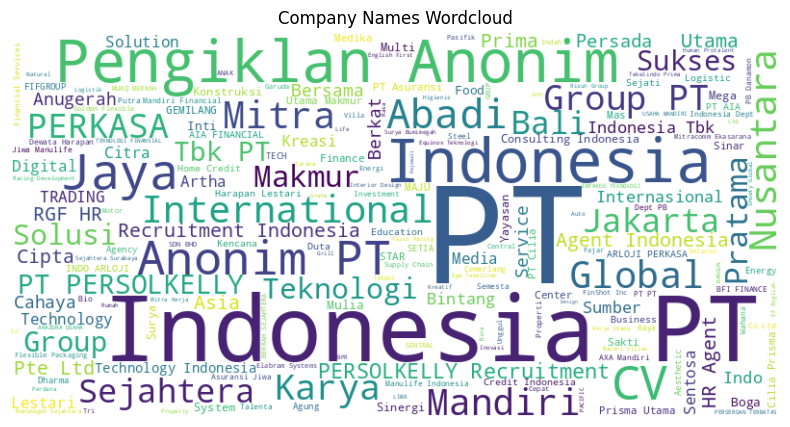

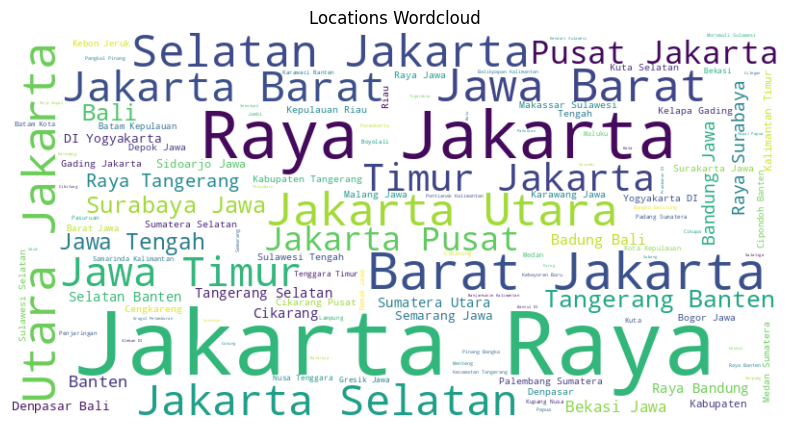

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('/content/job_data.csv')

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


text = ' '.join(df['Title'].astype(str).tolist())
create_wordcloud(text, "Job Titles Wordcloud")

text = ' '.join(df['Company'].astype(str).tolist())
create_wordcloud(text, "Company Names Wordcloud")

text = ' '.join(df['Location'].astype(str).tolist())
create_wordcloud(text, "Locations Wordcloud")

Delete Duplicate

In [ ]:
df = df.drop_duplicates()

print("\nDataFrame after removing duplicates:")
df.to_csv('job_data.csv', index=False)
df


DataFrame after removing duplicates:


,Title,Company,Location,Salary
0,HEAD WORKSHOP INTERIOR FURNITURE,Palais Construction,"Tangerang, Banten",Rp 9.000.000 – Rp 11.000.000 per month
1,Purchasing Staff Restoran,PT Kideta Boga Multirasa,"Jakarta Utara, Jakarta Raya",Rp 5.000.000 – Rp 6.000.000 per month
2,Customer Relation Officer Jakarta,EF English First Swara Group,"Jakarta Barat, Jakarta Raya",Rp 5.000.000 – Rp 7.000.000 per month
3,Operator Produksi ( Percetakan ),Tumbleryuk,"Jakarta Barat, Jakarta Raya",Rp 2.500.000 – Rp 3.500.000 per month
4,Telesales/Telemarketing (Cabang Manado),PT. JAYA BERSAMA SAPUTRA PERKASA,"Manado, Sulawesi Utara",Rp 3.000.000 – Rp 4.500.000 per month
...,...,...,...,...
2266,Financial Advisor - Area Tangerang Kota,PT AXA Mandiri Financial Services,"Tangerang Selatan, Banten","Rp 3,200,000 – Rp 4,800,000 per month"
2267,Interior Drafter,PT Jensen Group Bali,"Kuta Utara, Bali","Rp 4,000,000 – Rp 6,000,000 per month"
2268,FINANCE ACCOUNTING & TAX,PT Indobeef Indonesia,"Jakarta Selatan, Jakarta Raya",Rp 5.000.000 – Rp 6.000.000 per month
2269,Accounting,PT Mansoer Dasa Bersaudara,"Bandung, Jawa Barat",Rp 4.000.000 – Rp 6.000.000 per month


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('/content/job_data.csv')

# Create a DataFrame with non-null salary values
df_salary = df.dropna(subset=['Salary'])

# Create a DataFrame with null salary values
df_no_salary = df[df['Salary'].isnull()]

# Save the DataFrames to separate CSV files
df_salary.to_csv('job_data_with_salary.csv', index=False)
df_no_salary.to_csv('job_data_no_salary.csv', index=False)

# Skenario 1 (70:30)


Libraries

In [ ]:
# Base
import pandas as pd

# Split
from sklearn.model_selection import train_test_split

# Vector
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

# Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Pre-Modelling

In [ ]:
data_train = pd.read_csv('/content/streamlit.csv')

x_train = data_train.drop('Kelayakan', axis=1)
y_train = data_train['Kelayakan']

X_train, X_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.3, random_state=33)

X_train_combined = X_train.astype(str).apply(" ".join, axis=1)
X_test_combined = X_test.astype(str).apply(" ".join, axis=1)

vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')
X_train_tfidf = vectorizer.fit_transform(X_train_combined)
X_test_tfidf = vectorizer.transform(X_test_combined)

Skenario 1 (Naive Bayes)

In [ ]:
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

y_pred_NB = model_nb.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_NB)
conf_matrix = confusion_matrix(y_test, y_pred_NB)
class_report = classification_report(y_test, y_pred_NB)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Skenario 1 (SVM)

In [ ]:
# Train an SVM model
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
y_pred_SVM = model_svm.predict(X_test_tfidf)

# # Evaluate the model
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_SVM))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_SVM))
print("Classification Report:\n", classification_report(y_test, y_pred_SVM))

Skenario 1 (Decision Tree)

In [ ]:
# Train a Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42) # You can adjust hyperparameters here
model_dt.fit(X_train_tfidf, y_train)

# Make predictions on the validati  on set
y_pred_DT = model_dt.predict(X_test_tfidf)

# Evaluate the model
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_DT))
print("Classification Report:\n", classification_report(y_test, y_pred_DT))

# Skenario 2 (80:20)

Libraries

In [ ]:
# Base
import pandas as pd

# Split
from sklearn.model_selection import train_test_split

# Vector
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

# Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Pre-Training

In [ ]:
data_train2 = pd.read_csv('/content/streamlit.csv')

X_train2 = data_train2.drop('Kelayakan', axis=1)
y_train2 = data_train2['Kelayakan']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_train2, y_train2, test_size=0.2, random_state=33)

X_train_combined2 = X_train2.astype(str).apply(" ".join, axis=1)
X_test_combined2 = X_test2.astype(str).apply(" ".join, axis=1)

vectorizer2 = TfidfVectorizer(use_idf=True, strip_accents='ascii')
X_train_tfidf2 = vectorizer2.fit_transform(X_train_combined2)
X_test_tfidf2 = vectorizer2.transform(X_test_combined2)

Skenario 2 (Naive Bayes)

In [ ]:
model_nb2 = MultinomialNB()
model_nb2.fit(X_train_tfidf2, y_train2)

y_pred_NB2 = model_nb2.predict(X_test_tfidf2)

print("Training Data Evaluation:")
print(classification_report(y_test2, y_pred_NB2))

Skenario 2 (SVM)

In [ ]:
model_svm2 = SVC(kernel='linear')
model_svm2.fit(X_train_tfidf2, y_train2)

y_pred_SVM2 = model_svm2.predict(X_test_tfidf2)

print("Training Data Evaluation (SVM):")
print(classification_report(y_test2, y_pred_SVM2))

Skenario 2 (Decision Tree)

In [ ]:
# Model Decision Tree
model_dt2 = DecisionTreeClassifier(random_state=42)
model_dt2.fit(X_train_tfidf2, y_train2)

# Prediksi dengan Decision Tree
y_pred_DT2 = model_dt2.predict(X_test_tfidf2)

print("Training Data Evaluation (Decision Tree):")
print(classification_report(y_test2, y_pred_DT2))

# ROC-AUC

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# ** Data Loading dan Preprocessing **
data_train = pd.read_csv('/content/streamlit.csv')
data_train2 = pd.read_csv('/content/streamlit.csv')

# Skenario 1: Splitting 70:30
X_train, X_test, y_train, y_test = train_test_split(
    data_train.drop('Kelayakan', axis=1),
    data_train['Kelayakan'],
    test_size=0.3,
    random_state=33
)

# Skenario 2: Splitting 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    data_train2.drop('Kelayakan', axis=1),
    data_train2['Kelayakan'],
    test_size=0.2,
    random_state=33
)

# Combine data for TF-IDF
X_train_combined = X_train.astype(str).apply(" ".join, axis=1)
X_test_combined = X_test.astype(str).apply(" ".join, axis=1)

X_train_combined2 = X_train2.astype(str).apply(" ".join, axis=1)
X_test_combined2 = X_test2.astype(str).apply(" ".join, axis=1)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')
X_train_tfidf = vectorizer.fit_transform(X_train_combined)
X_test_tfidf = vectorizer.transform(X_test_combined)

vectorizer2 = TfidfVectorizer(use_idf=True, strip_accents='ascii')
X_train_tfidf2 = vectorizer2.fit_transform(X_train_combined2)
X_test_tfidf2 = vectorizer2.transform(X_test_combined2)

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train2_encoded = label_encoder.fit_transform(y_train2)
y_test2_encoded = label_encoder.transform(y_test2)

# ** Models **
models = {
    "NB_Skenario1": MultinomialNB(),
    "SVM_Skenario1": SVC(kernel='linear', probability=True),
    "DT_Skenario1": DecisionTreeClassifier(random_state=42),
    "NB_Skenario2": MultinomialNB(),
    "SVM_Skenario2": SVC(kernel='linear', probability=True),
    "DT_Skenario2": DecisionTreeClassifier(random_state=42)
}

# Fit models dan prediksi probabilitas untuk masing-masing skenario
predictions = {}
for model_name, model in models.items():
    if "Skenario1" in model_name:
        # Skenario 1 (70:30)
        model.fit(X_train_tfidf, y_train_encoded)
        predictions[model_name] = model.predict_proba(X_test_tfidf)[:, 1]
    else:
        # Skenario 2 (80:20)
        model.fit(X_train_tfidf2, y_train2_encoded)
        predictions[model_name] = model.predict_proba(X_test_tfidf2)[:, 1]

# ** ROC-AUC Plotting **
plt.figure(figsize=(12, 8))
for model_name, y_pred in predictions.items():
    if "Skenario1" in model_name:
        y_test_plot = y_test_encoded
        label = "Skenario 1 (70:30)"
    else:
        y_test_plot = y_test2_encoded
        label = "Skenario 2 (80:20)"

    fpr, tpr, _ = roc_curve(y_test_plot, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ({label}) (AUC = {roc_auc:.4f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Add titles and labels
plt.title('ROC Curves untuk Skenario 1 (70:30) dan Skenario 2 (80:20)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid()

# Show plot
plt.show()

# Test with Actual Data

**PERINGATAN PILIH SALAH SATU!!!!!!!!!!**

---



Skenario 1

In [ ]:
data_test = pd.read_csv('/content/data_fix.csv')

X_test_combined = data_test.astype(str).apply(" ".join, axis=1)

X_test_tfidf = vectorizer.transform(X_test_combined)

# PERINGATAN PILIH SALAH SATU!!!!!!!!!
# Naive Bayes (Multinomial)
# y_pred_test = model_nb.predict(X_test_tfidf)

# SVM
# y_pred_test = model_svm.predict(X_test_tfidf)

# Decision Tree
y_pred_test = model_dt.predict(X_test_tfidf)

data_test['Kelayakan'] = y_pred_test
data_test['Kelayakan'].value_counts()

# Exporting
data_test.to_csv('/content/streamlit.csv', index=False)

Skenario 2

In [ ]:
data_test2 = pd.read_csv('/content/data_fix.csv')

X_test_combined2 = data_test2.astype(str).apply(" ".join, axis=1)

X_test_tfidf2 = vectorizer2.transform(X_test_combined2)

# PERINGATAN PILIH SALAH SATU!!!!!!!!!
# Naive Bayes (Multinomial)
# y_pred_test2 = model_nb2.predict(X_test_tfidf2)

# SVM
# y_pred_test2 = model_svm2.predict(X_test_tfidf2)

# Decision Tree
y_pred_test2 = model_dt2.predict(X_test_tfidf2)

data_test2['Kelayakan'] = y_pred_test2
data_test2['Kelayakan'].value_counts()

# Exporting
data_test2.to_csv('/content/streamlit.csv', index=False)